1. Import the dataset iris_dirty.csv from here into a Pandas dataframe. Check the Pandas documentation of read_csv() and use the column names sepal_length, sepal_width, petal_length, petal_width and class when you read in the data.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('iris_dirty.csv',names= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','class'])

2. Explore the data with the known Pandas functions head(), info(), describe(), count(), value_counts() (for all columns). Watch for missing values, duplicates, spelling errors, non-uniform units, columns with datatypes they shouldn't have etc.

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    object 
 4   class         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length
count,151.000000,150.000000,151.000000
mean,6.196689,3.057333,3.764901
std,4.324325,0.432776,1.760197
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.400000
75%,6.400000,3.300000,5.100000
max,58.000000,4.400000,6.900000


In [6]:
data.count()

sepal_length    151
sepal_width     150
petal_length    151
petal_width     151
class           151
dtype: int64

* sepal_width has a Null 

In [7]:
data.value_counts()

sepal_length  sepal_width  petal_length  petal_width  class          
4.9           3.1          1.5           1 mm         Iris-setosa        3
7.0           3.2          4.7           14 mm        Iris-versicolor    2
6.3           2.9          5.6           18 mm        Iris-virginica     1
6.2           3.4          5.4           23 mm        Iris-virginica     1
6.3           2.3          4.4           13 mm        Iris-versicolor    1
                                                                        ..
5.5           2.3          4.0           13 mm        Iris-versicolor    1
              2.4          3.7           10 mm        Iris-versicolor    1
                           3.8           11 mm        Iris-versicolor    1
              2.5          4.0           13 mm        Iris-versicolor    1
58.0          2.7          5.1           19 mm        Iris-virginica     1
Length: 147, dtype: int64

In [8]:
data['class'].unique()

array(['Iris-setosa', 'Iris-setsoa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

* Typo in class Iris-setsoa is Iris-setosa

In [9]:
data['sepal_length'].unique()

array([ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.4,  4.8,  4.3,  5.8,  5.7,
        5.2,  5.5,  4.5,  5.3,  7. ,  6.4,  6.9,  6.5,  6.3,  6.6,  5.9,
        6. ,  6.1,  5.6,  6.7,  6.2,  6.8,  7.1,  7.6,  7.3,  7.2,  7.7,
        7.4,  7.9, 58. ])

In [10]:
data['sepal_length'].value_counts()

5.0     10
5.1      9
6.3      9
6.7      8
5.7      8
5.5      7
6.4      7
5.6      6
5.4      6
4.9      6
5.8      6
6.1      6
6.0      6
4.8      5
6.5      5
5.2      4
7.7      4
6.9      4
4.6      4
6.2      4
6.8      3
5.9      3
4.4      3
7.2      3
7.0      2
4.7      2
6.6      2
7.3      1
58.0     1
7.9      1
7.6      1
7.1      1
7.4      1
4.5      1
5.3      1
4.3      1
Name: sepal_length, dtype: int64

* outlier 58

In [11]:
data['sepal_width'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6, nan])

In [12]:
data['petal_width'].unique()

array(['2 mm', '4 mm', '3 mm', '1 mm', '5 mm', '6 mm', '14 mm', '15 mm',
       '13 mm', '16 mm', '10 mm', '11 mm', '18 mm', '12 mm', '17 mm',
       '25 mm', '19 mm', '21 mm', '22 mm', '20 mm', '24 mm', '23 mm'],
      dtype=object)

* the unit is always mm, so can be deleted and the values turned into integer

3. Substitute missing values with the column mean. Check/remove duplicates. Correct possible spelling errors.

In [13]:
#remove duplicates
data = data.drop_duplicates()
data.count()

sepal_length    148
sepal_width     147
petal_length    148
petal_width     148
class           148
dtype: int64

In [14]:
#substitue missing values with column mean
data= data.fillna(data.mean())

In [15]:
data['sepal_width'].unique()

array([3.5       , 3.        , 3.2       , 3.1       , 3.6       ,
       3.9       , 3.4       , 2.9       , 3.7       , 4.        ,
       4.4       , 3.8       , 3.3       , 4.1       , 4.2       ,
       2.3       , 2.8       , 2.4       , 2.7       , 2.        ,
       2.2       , 2.5       , 2.6       , 3.05578231])

In [16]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [17]:
#Correct possible spelling errors
def flower_spell(x):
    if x in ['Iris-setsoa']:
        return 'Iris-setosa'
    else:
        return x

In [18]:
data['class']=data['class'].apply(flower_spell)

In [19]:
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

4. Bring all columns to centimeter length. Before, transform any column to numeric if necessary.

In [20]:
#first delete ' mm'
data['petal_width'] = data['petal_width'].map(lambda x: x.rstrip(' mm'))

In [21]:
#now transform to numeric
data['petal_width']=pd.to_numeric(data['petal_width'])

In [22]:
#all columns to centimeter length
data['petal_width']=(data['petal_width'])/10

In [23]:
data['petal_width'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

4. Check for outliers with .describe() or means of plotting. Think about the appropriate way to correct for possible outliers and perform that correction.

In [24]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,148.000000,148.000000,148.000000,148.000000
mean,6.208784,3.055782,3.789189,1.213514
std,4.365089,0.435520,1.756470,0.757426
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,58.000000,4.400000,6.900000,2.500000


* the outlier is in sepal length. It can be assumed that it was a typo and is supposed to be 5.8cm and not 58cm.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

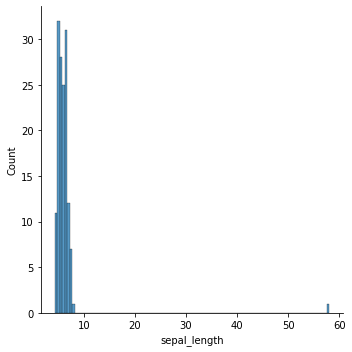

In [26]:
sns.displot(data['sepal_length'])

In [27]:
#correcting the outlier
def outlier_corr(x):
    if x in [58]:
        return 5.8
    else:
        return x

In [28]:
data['sepal_length']=data['sepal_length'].apply(outlier_corr)

6. Plot a correlation matrix with a heatmap between the numeric features.

In [29]:
corr_matrix = data.corr()

In [30]:
type(corr_matrix)

pandas.core.frame.DataFrame

<AxesSubplot:>

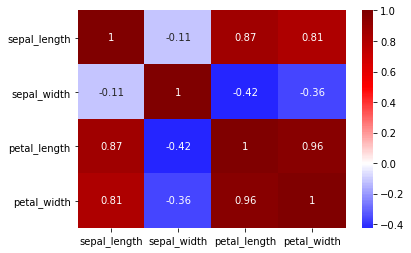

In [31]:
sns.heatmap(corr_matrix,
            cmap='seismic',
            center=0,
            annot=True)

 7. Model the relationship between our features (the four numeric flower metrics) and the label (class) with Logistic Regression using LogisticRegression() from the sklearn.linear_model module. For the purpose of model validation, use the known train-test-split method with a size parameter of 0.3. Calculate the predicted labels, the accuracy score of y_test and y_predicted and plot a confusion matrix of the two.

In [32]:
#class sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)[source]¶

In [33]:
import numpy as np
from sklearn.linear_model import LogisticRegression

In [34]:
X=data.select_dtypes(include =np.number)

In [35]:
y=data['class']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [38]:
# create an (untrained) model "instance"
logreg = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr')

# train the model
logreg.fit(X_train,y_train)

#predict target data from test features , that the model has never seen
y_pred=logreg.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score 
predictions = logreg.predict(X_test)

In [40]:
predictions

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [41]:
accuracy_score(y_test, predictions)

0.9555555555555556

In [58]:
type(y_test)

pandas.core.series.Series

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [44]:
confusion_matrix= confusion_matrix(y_test,predictions,  labels=['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'])


In [55]:
plot_confusion_matrix(y_test,y_pred)
plt.show()

TypeError: plot_confusion_matrix() missing 1 required positional argument: 'y_true'